<a href="https://colab.research.google.com/github/ridvan5886/-Linear-Regression-Project-with-Teams-US-Home-Prices/blob/main/Machine_Learning_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
! gdown  --id 1rjRnOXTed9YF0NvNdF2IRCfNT0QC8iG7

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rjRnOXTed9YF0NvNdF2IRCfNT0QC8iG7
To: /content/nyc-rolling-sales-1.csv
100% 13.6M/13.6M [00:00<00:00, 209MB/s]


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib  inline
sns.set(style='white', context='notebook', palette='deep') 
import joblib

# ML packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate,KFold

In [117]:
#Uploading data in csv format
df = pd.read_csv("/content/nyc-rolling-sales-1.csv", index_col=False)

In [200]:
def random_SCV(pipe = [], 
               grid_param = [],
               n_iter = 10, 
               cv = 5, 
               scoring = 'neg_mean_squared_error', 
               rnd_state = 42, 
               file_name = "",
              training = []):
    
    rnd_search = RandomizedSearchCV(pipe,param_distributions=grid_param, n_iter=n_iter, cv=cv, 
                                    scoring=scoring,
                                   verbose = 100000)
    rnd_search.fit(training[0],training[1])
    wr_pkl_file(file_name, rnd_search, False)
    

def grid_SCV(pipe = [], grid_param = [], cv = 5, scoring = 'neg_mean_squared_error', file_name = "", training = []):
    rnd_search = GridSearchCV(pipe, grid_param, cv=cv, scoring=scoring, verbose = 100)
    rnd_search.fit(training[0],training[1])
    wr_pkl_file(file_name, rnd_search, False)


def wr_pkl_file(file_name = "",content = "", read = False):
    if file_name:
        path_ = "./param_tuning/" + file_name
        if read:
            return joblib.load(path_)
             
        else:
            if content:
                joblib.dump(content, path_)
                
def print_results(labels = [], est = [], plt_num = 50, testing = []):
    col = 1
    plt.rcParams["figure.figsize"] = (30,15)
    for name, clf in zip(labels,est):
        print(name)
        
        df_labels_prediction = clf.predict(testing[0])
    
        print("R-Squared: {:.3f}".format(r2_score(np.exp(testing[1]), np.exp(df_labels_prediction))))
        mse = mean_squared_error(np.exp(testing[1]), np.exp(df_labels_prediction))
        mae = mean_absolute_error(np.exp(testing[1]), np.exp(df_labels_prediction))
        
        rmse = np.sqrt(mse)
        print("Root Mean Square Error: {:,.3f}".format(rmse))
        print("Mean Absolute Error: {:,.3f}".format(mae))
        print()

        plt.subplot(3,1,col)
        
        plt.title(name.replace(":",""), fontsize = 18)
        plt.xticks(fontsize = 18)
        plt.yticks(fontsize = 18)
        plt.plot(range(plt_num), np.exp(df_labels_prediction)[:plt_num], "*-", label='model prediction')
        plt.plot(range(plt_num), np.exp(testing[1])[:plt_num], "o--", label='true value')
        plt.legend()
        col += 1

def validation(models = [], estimators = [], training = [], cv = 5, train_score = False):
    if len(models) != len(estimators):
        print("Error: model names and estimator must have the same length")
        return

    for model, estimator in zip(models, estimators):
        scores = cross_validate(estimator, training[0], training[1], cv=cv,
                            scoring=('r2',
                                        'neg_mean_squared_error',
                                        'neg_mean_absolute_error'),
                            return_train_score=train_score)
        print(model)
        print("R-Squared: {:,.3f}".format(np.mean(scores["test_r2"])))
        print("Root Mean Squared Error: {:,.3f}".format(np.mean(np.sqrt(-scores["test_neg_mean_squared_error"]))))
        print("Mean Absolute Error: {:,.3f}".format(np.mean(-scores["test_neg_mean_absolute_error"])))
        print()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [119]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [120]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [121]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [122]:
df.shape

(84548, 22)

In [123]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [124]:
### (0 - 5) -> 5 being very important
(4) # BOROUGH - figure out how to match them
(1) # NEIGHBORHOOD - not so important but can be kept
(2) # BUILDING CLASS CATEGORY - can be important but building class already gives the info
(3) # TAX CLASS AT PRESENT - tells us how much tax the owners pay
(0) # BLOCK - unimportant
(0) # LOT - unimportant
(0) # EASE-MENT - very unimportant
(3) # BUILDING CLASS AT PRESENT - teaches us the building class

(1) # ADDRESS - not so important
(0) # APARTMENT NUMBER - not so important
(3) # ZIP CODE - zip code
(2) # RESIDENTIAL UNITS - self explanatory
(2) # COMMERCIAL UNITS - just as self exp as last
(2) # TOTAL UNITS - yup
(4) # LAND SQUARE FEET - could be cool to work with (turn them into ints) (useable space)
(4) # GROSS SQUARE FEET - square footage with second floors, etc (all space (use this metric))
(3) # YEAR BUILT - could be cool to work with (already ints)
(3) # TAX CLASS AT TIME OF SALE - (ints) -- 1 - 20.919%, 2 - 12.612%, 3 - 12.093%, 4 - 10.514%
(3) # BUILDING CLASS AT TIME OF SALE - like before but it changed
(5) # SALE PRICE - important (change to int)
(4) # SALE DATE - important -- # years = [int(n[0:4]) for n in df['SALE DATE'] ]
(1) # ADDRESS - not so important
(0) # APARTMENT NUMBER - not so important
(3) # ZIP CODE - zip code
(2) # RESIDENTIAL UNITS - self explanatory
(2) # COMMERCIAL UNITS - just as self exp as last
(2) # TOTAL UNITS - yup
(4) # LAND SQUARE FEET - could be cool to work with (turn them into ints) (useable space)
(4) # GROSS SQUARE FEET - square footage with second floors, etc (all space (use this metric))
(3) # YEAR BUILT - could be cool to work with (already ints)
(3) # TAX CLASS AT TIME OF SALE - (ints) -- 1 - 20.919%, 2 - 12.612%, 3 - 12.093%, 4 - 10.514%
(3) # BUILDING CLASS AT TIME OF SALE - like before but it changed
(5) # SALE PRICE - important (change to int)
(4) # SALE DATE - important -- # years = [int(n[0:4]) for n in df['SALE DATE'] ]
(3) # YEAR BUILT - could be cool to work with (already ints)
(3) # TAX CLASS AT TIME OF SALE - (ints) -- 1 - 20.919%, 2 - 12.612%, 3 - 12.093%, 4 - 10.514%
(3) # BUILDING CLASS AT TIME OF SALE - like before but it changed
(5) # SALE PRICE - important (change to int)
(4) # SALE DATE - important -- # years = [int(n[0:4]) for n in df['SALE DATE'] ]

4

In [125]:
from collections import Counter

# replace the value of col to see the unique values that appear in that column
col = 'TAX CLASS AT PRESENT'
show = sorted(df[col].dropna().unique())

# Clean Up to Data

In [126]:
### 1) Replacing missing values, Dropping index and EASE-MENT
### 2) Convert to floats:
###    LAND SQUARE FEET
###    GROSS SQUARE FEET
###    SALE PRICE
### 3) Get rid of (drop):
###    BLOCK
###    LOT
###    EASE-MENT
###    APARTMENT NUMBER
###    NEIGHBORHOOD
###    ADDRESS
### 4) Add columns:
###    year sold
###    month sold
###    month and year
###    price per sqrt

In [127]:
# Replacing missing values with NaN
df.replace(" -  ",np.nan, inplace = True)

In [128]:
# Dropping index and EASE-MENT
df.drop(['EASE-MENT',
         'Unnamed: 0',
         'APARTMENT NUMBER',
         'BUILDING CLASS AT TIME OF SALE'], axis=1, inplace=True)

In [129]:
# Convert str to float
floats = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for col in floats:
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [130]:
# Removing white spaces
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.lstrip()
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.rstrip()

In [131]:
# Convert 'SALE DATE' column to datetime format
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [132]:
# Add new columns
df['Year Sold'] = df['SALE DATE'].dt.year
df['Month Sold'] = df['SALE DATE'].dt.month
df['Month and Year'] = df['SALE DATE'].dt.strftime('%b %Y')
df["price_per_sqrt"] = df['SALE PRICE'] / df['GROSS SQUARE FEET']

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Year Sold,Month Sold,Month and Year,price_per_sqrt
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,...,1633.0,6440.0,1900,2,6625000.0,2017-07-19,2017,7,Jul 2017,1028.726708
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,...,4616.0,18690.0,1900,2,NaN,2016-12-14,2016,12,Dec 2016,NaN
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,...,2212.0,7803.0,1900,2,NaN,2016-12-09,2016,12,Dec 2016,NaN
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,...,2272.0,6794.0,1913,2,3936272.0,2016-09-23,2016,9,Sep 2016,579.374742
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,...,2369.0,4615.0,1900,2,8000000.0,2016-11-17,2016,11,Nov 2016,1733.477790


In [133]:
# Categories we would like to focus on 
df1 = df.loc[df['BUILDING CLASS CATEGORY']=='01 ONE FAMILY DWELLINGS']
df2 = df.loc[df['BUILDING CLASS CATEGORY']=='02 TWO FAMILY DWELLINGS']
df3 = df.loc[df['BUILDING CLASS CATEGORY']=='13 CONDOS - ELEVATOR APARTMENTS']
df4 = df.loc[df['BUILDING CLASS CATEGORY']=='10 COOPS - ELEVATOR APARTMENTS']
df5 = df.loc[df['BUILDING CLASS CATEGORY']=='03 THREE FAMILY DWELLINGS']
df6 = df.loc[df['BUILDING CLASS CATEGORY']=='09 COOPS - WALKUP APARTMENTS']
df7 = df.loc[df['BUILDING CLASS CATEGORY']=='15 CONDOS - 2-10 UNIT RESIDENTIAL']
df8 = df.loc[df['BUILDING CLASS CATEGORY']=='07 RENTALS - WALKUP APARTMENTS']
df9 = df.loc[df['BUILDING CLASS CATEGORY']=='08 RENTALS - ELEVATOR APARTMENTS']
df10 = df.loc[df['BUILDING CLASS CATEGORY']=='06 TAX CLASS 1 - OTHER']
df11 = df.loc[df['BUILDING CLASS CATEGORY']=='41 TAX CLASS 4 - OTHER']
df12 = df.loc[df['BUILDING CLASS CATEGORY']=='04 TAX CLASS 1 CONDOS']


In [134]:
# Concat dataframes
applist = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
df = pd.concat(applist)

In [135]:
df = df[df['SALE PRICE'] > 5e5]
df = df[df['SALE PRICE'] < 5e6]

In [136]:
# # Residential units in range between 1 and 9 inclusive
df = df[df['RESIDENTIAL UNITS'] < 10]
df = df[df['RESIDENTIAL UNITS'] != 0]

In [137]:
# No commercial units
df = df[df['COMMERCIAL UNITS'] == 0]

In [138]:
# Drop unnecessary columns
df.drop(labels = ["COMMERCIAL UNITS","TOTAL UNITS"], axis = 1, inplace = True)

In [139]:
# Remove duplicates
print(df.shape)
df.drop_duplicates(inplace = True)
df.shape

(24581, 20)


(24548, 20)

In [140]:
# Remove NaN
df.dropna(inplace=True)

In [141]:
# Calculate the number of NaN values in each column
nan_counts = df.isna().sum()

# Print the NaN counts
print(nan_counts)

BOROUGH                      0
NEIGHBORHOOD                 0
BUILDING CLASS CATEGORY      0
TAX CLASS AT PRESENT         0
BLOCK                        0
LOT                          0
BUILDING CLASS AT PRESENT    0
ADDRESS                      0
ZIP CODE                     0
RESIDENTIAL UNITS            0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
SALE DATE                    0
Year Sold                    0
Month Sold                   0
Month and Year               0
price_per_sqrt               0
dtype: int64


In [142]:
# Define costum label encoder (inline lambda function)
label_encoder = lambda x: {uniq : i for i,uniq in enumerate(df[x].unique().tolist())}

In [147]:
df.shape

(18423, 20)

84548 - total dataframe length
66125 - invalid p/sf
- sales price is missing
- square footage is missing
78.2 % of the p/sf data is useless

# Visualization

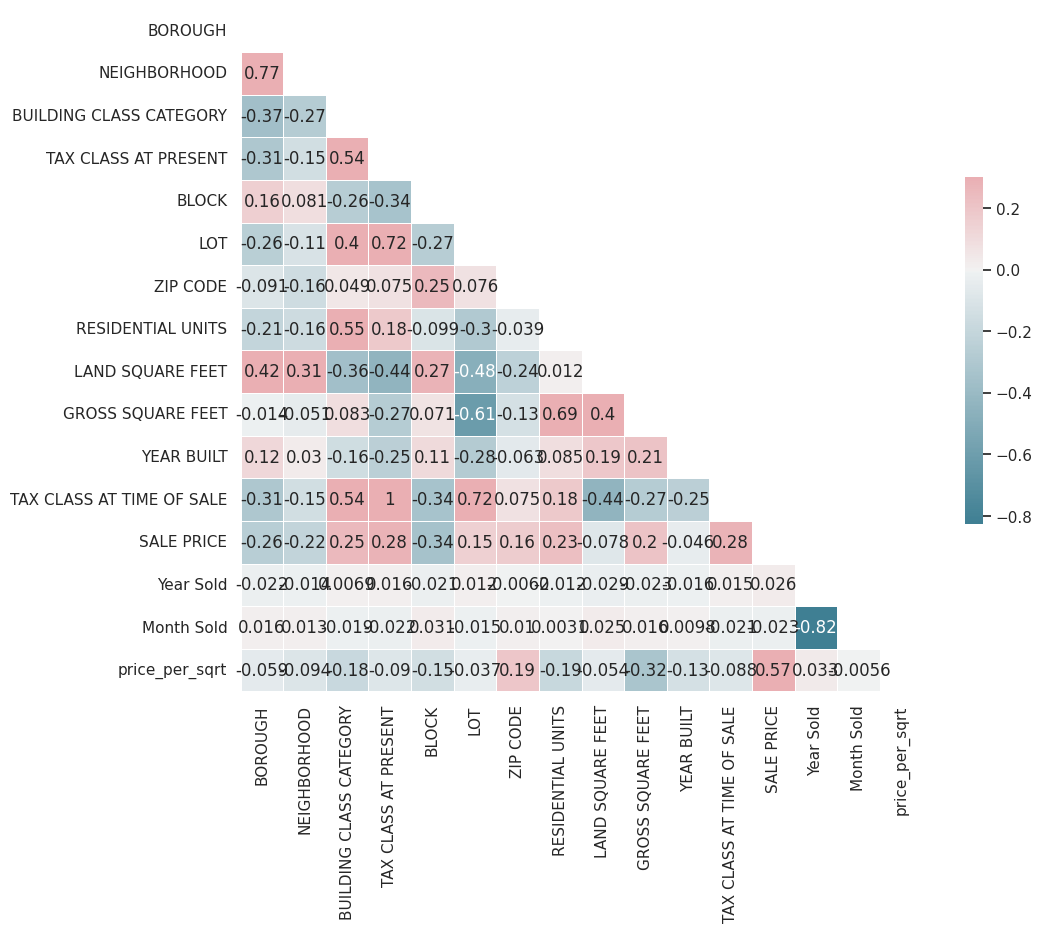

In [148]:
# New copy of dataframe
df_copy = df.copy()

df_copy["SALE PRICE"] = np.log(df_copy["SALE PRICE"])

# Map different columns to numbers
df_copy['NEIGHBORHOOD'] = df_copy['NEIGHBORHOOD'].map(label_encoder('NEIGHBORHOOD'))
df_copy['BUILDING CLASS CATEGORY'] = df_copy['BUILDING CLASS CATEGORY'].map(label_encoder('BUILDING CLASS CATEGORY'))
df_copy["TAX CLASS AT PRESENT"] = df_copy["TAX CLASS AT PRESENT"].map({'1': 1,'1A':1, '1B':1, '1C':1, 
                                                             '2':2, '2C':2, '2B':2, '2A':2,
                                                             '4':4})
# **** Code was taken from Jupiter Notebooks week 1 ******
sns.set(style="white")

# Spearman correlation
corr  = df_copy.corr(method = "pearson")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


del df_copy

## **Findings**

1. Borough and Neighborhood are good predictors.

2. Building class category could be a strong predictors.

3. Block, Residential units and Gross square feet are all good predictors

4. Tax Calss at Present could cause data leakage

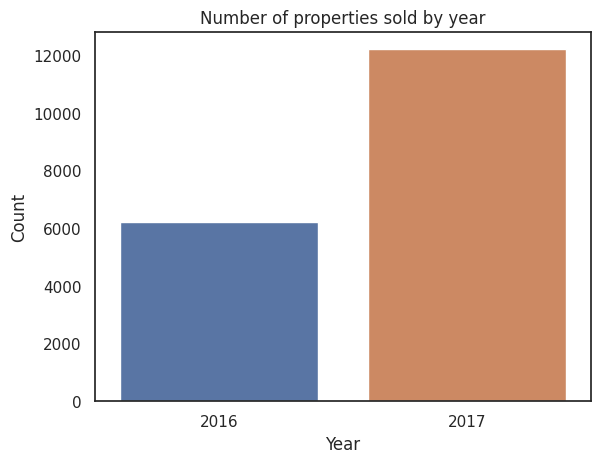

In [149]:
# Create a bar plot
counts_per_year = [sum(df['Year Sold'] == 2016), sum(df['Year Sold'] == 2017)]
sns.barplot(x=[2016, 2017], y=counts_per_year)
plt.title('Number of properties sold by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

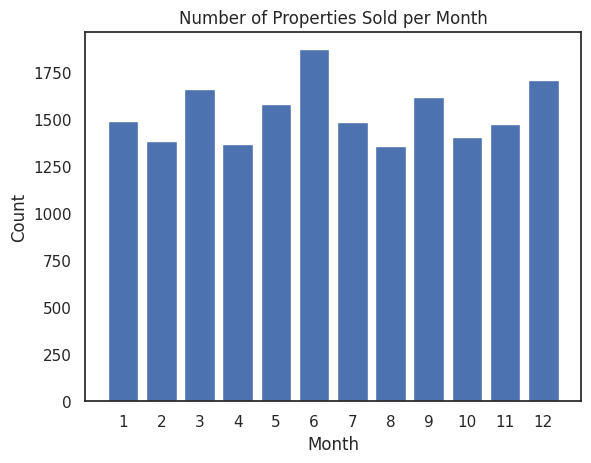

In [150]:
# Count the number of properties sold per month
properties_sold_per_month = df['Month Sold'].value_counts().sort_index()

# Create a bar plot
plt.bar(properties_sold_per_month.index, properties_sold_per_month.values)
plt.title('Number of Properties Sold per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(properties_sold_per_month.index)
plt.show()

It's important to note that although most houses were sold in 2017 the sales data begins in September of 2016
and ends in August of 2017 so it's only 1 year of data, each month being unique to its year

In [151]:
# Convert "SALE DATE" column to datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# Find the start and end dates of sales
sales_start_date = df['SALE DATE'].min()
sales_end_date = df['SALE DATE'].max()

print("Sales start date:", sales_start_date)
print("Sales end date:", sales_end_date)

Sales start date: 2016-09-01 00:00:00
Sales end date: 2017-08-31 00:00:00


### Lets take a look at tax classes
Class 1: One-to three-unit, predominantly residential properties. Also includes certain vacant land and certain types of condominiums.

Class 2: Residential property with 3+ units, including condos and co-ops

Class 3: Utility company equipment and special franchise property

Class 4: All other real property, including office buildings, factories, stores, hotels, and lofts

Text(0.5, 1.0, 'Num of properties sold by tax class')

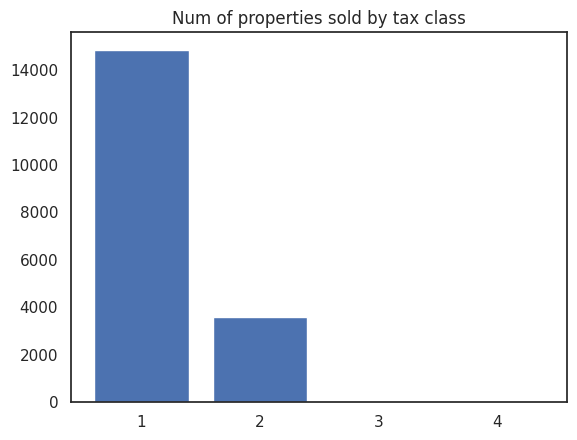

In [152]:
# plt.hist(df['TAX CLASS AT TIME OF SALE'], bins=4)
plt.bar(['1','2','3','4'], [sum(df['TAX CLASS AT TIME OF SALE'] == x) for x in range(1, 5)])
plt.title('Num of properties sold by tax class')

In [153]:
# Count the number of properties sold by tax class
properties_sold_by_tax_class = df['TAX CLASS AT TIME OF SALE'].value_counts()

print(properties_sold_by_tax_class)

1    14856
2     3567
Name: TAX CLASS AT TIME OF SALE, dtype: int64


In [154]:
months_in_order = ['Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17']

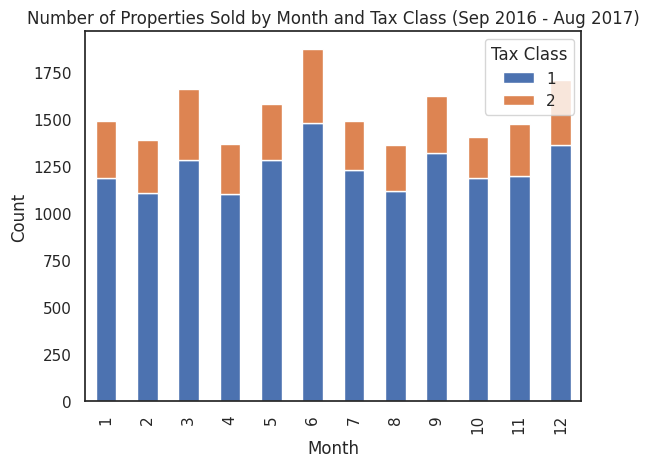

In [155]:

# Filter data for the desired timeframe
start_date = '2016-09-01'
end_date = '2017-08-31'
filtered_data = df[(df['SALE DATE'] >= start_date) & (df['SALE DATE'] <= end_date)]

# Group by month and tax class and count the number of properties
properties_sold_by_month_tax_class = filtered_data.groupby(['Month Sold', 'TAX CLASS AT TIME OF SALE']).size().unstack()

# Create a bar plot
properties_sold_by_month_tax_class.plot(kind='bar', stacked=True)
plt.title('Number of Properties Sold by Month and Tax Class (Sep 2016 - Aug 2017)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Tax Class')
plt.show()

### Percentage of sales by property category (50)

In [156]:
property_types = df['BUILDING CLASS CATEGORY'].nunique()
print("Number of property types:", property_types)

Number of property types: 9


In [157]:
property_types = df['BUILDING CLASS CATEGORY'].value_counts()
print(property_types)

02 TWO FAMILY DWELLINGS              6520
01 ONE FAMILY DWELLINGS              6227
13 CONDOS - ELEVATOR APARTMENTS      1951
03 THREE FAMILY DWELLINGS            1808
07 RENTALS - WALKUP APARTMENTS        988
15 CONDOS - 2-10 UNIT RESIDENTIAL     626
04 TAX CLASS 1 CONDOS                 298
06 TAX CLASS 1 - OTHER                  3
08 RENTALS - ELEVATOR APARTMENTS        2
Name: BUILDING CLASS CATEGORY, dtype: int64


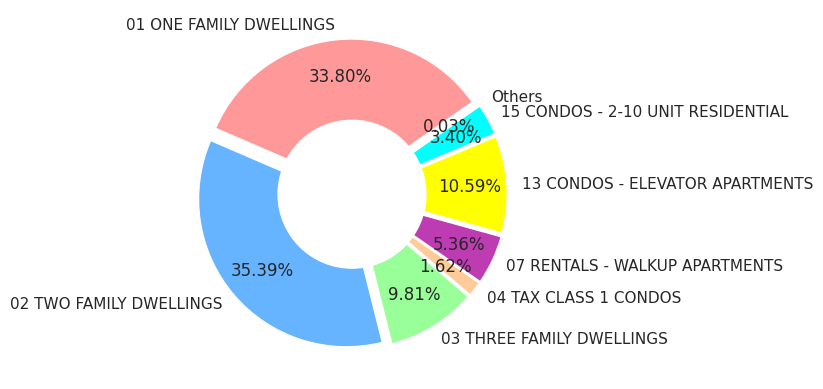

In [158]:
property_types = {'01 ONE FAMILY DWELLINGS': 6227,
 '02 TWO FAMILY DWELLINGS': 6520,
 '03 THREE FAMILY DWELLINGS': 1808,
 '04 TAX CLASS 1 CONDOS' :  298,
 '07 RENTALS - WALKUP APARTMENTS': 988,
 '13 CONDOS - ELEVATOR APARTMENTS': 1951,
 '15 CONDOS - 2-10 UNIT RESIDENTIAL': 626,
 'Others' : 5}

labels = property_types.keys()
sizes = property_types.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75, explode = tuple([0.05] * 8))
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

### Lets look at the top four

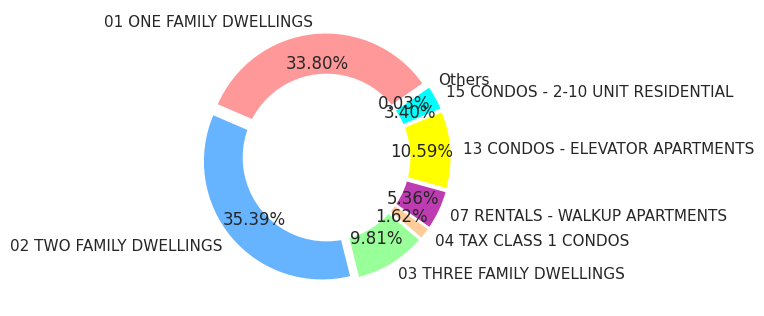

In [159]:
property_types = {'01 ONE FAMILY DWELLINGS': 6227,
 '02 TWO FAMILY DWELLINGS': 6520,
 '03 THREE FAMILY DWELLINGS': 1808,
 '04 TAX CLASS 1 CONDOS' :  298,
 '07 RENTALS - WALKUP APARTMENTS': 988,
 '13 CONDOS - ELEVATOR APARTMENTS': 1951,
 '15 CONDOS - 2-10 UNIT RESIDENTIAL': 626,
 'Others' : 5}

labels = property_types.keys()
sizes = property_types.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
explode = (0.18, 0.18, 0.05, 0.05, 0.18, 0.18, 0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=35, pctdistance=0.75, explode = tuple([0.05] * 8))
centre_circle = plt.Circle((0,0),0.70,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()

**### The top 4 categories make up about 90% of all sales.**

In [160]:
df['Month and Year'] = df['SALE DATE'].dt.strftime('%b %Y')

In [161]:
property_types = {'01 ONE FAMILY DWELLINGS': 6227,
 '02 TWO FAMILY DWELLINGS': 6520,
 '03 THREE FAMILY DWELLINGS': 1808,
 '13 CONDOS - ELEVATOR APARTMENTS': 1951
 }

df_pop_cats = pd.concat([df[df['BUILDING CLASS CATEGORY'] == prop_type] for prop_type in property_types.keys()])
df_pop_cats.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Year Sold,Month Sold,Month and Year,price_per_sqrt
4172,1,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,2 GROVE COURT,10014,1,384.0,1152.0,1901,1,1375000.0,2016-10-07,2016,10,Oct 2016,1193.576389
4800,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,1942,58,A4,288 W. 137TH STREET,10030,1,1549.0,3036.0,1910,1,2300000.0,2016-11-30,2016,11,Nov 2016,757.575758
4801,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,1960,41,A9,307 WEST 136 STREET,10030,1,1665.0,3200.0,1910,1,1510000.0,2017-01-03,2017,1,Jan 2017,471.875000
4804,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2024,50,A5,238 WEST 139TH STREET,10030,1,1699.0,3620.0,1910,1,3050000.0,2017-01-31,2017,1,Jan 2017,842.541436
4805,1,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2041,126,A9,314 WEST 138 STREET,10030,1,1699.0,3536.0,1901,1,1595790.0,2017-08-31,2017,8,Aug 2017,451.298077


**### Now lets look at revenue**

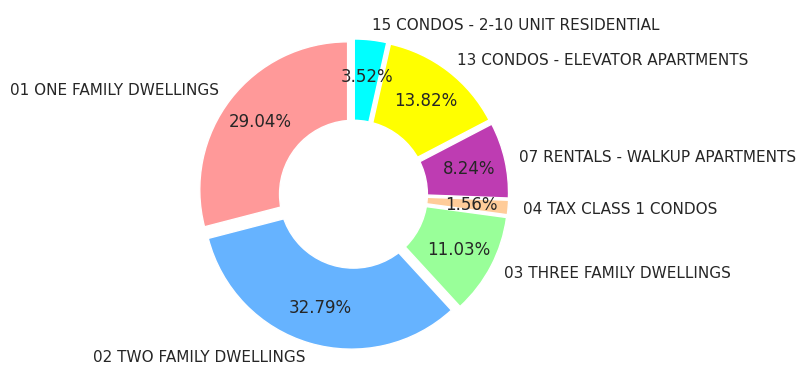

In [162]:
property_types = {'01 ONE FAMILY DWELLINGS': 6227,
 '02 TWO FAMILY DWELLINGS': 6520,
 '03 THREE FAMILY DWELLINGS': 1808,
 '04 TAX CLASS 1 CONDOS' :  298,
 '07 RENTALS - WALKUP APARTMENTS': 988,
 '13 CONDOS - ELEVATOR APARTMENTS': 1951,
 '15 CONDOS - 2-10 UNIT RESIDENTIAL': 626,
}

property_type_revenues = {}

for prop_type in property_types:
    property_type_revenues[prop_type] = sum([price for price in df[df['BUILDING CLASS CATEGORY'] == prop_type]['SALE PRICE'] if price > 0])
    if prop_type == 'Other':
        property_type_revenues[prop_type] = 33728395405
labels = property_type_revenues.keys()
sizes = property_type_revenues.values()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%',startangle=90, pctdistance=0.75, explode = tuple([0.05] * 7))
centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
plt.gcf().gca().add_artist(centre_circle)

### There exists a positive association between the number of property types and property type revenues.

**# Find the average home price by zipcode**

In [163]:
def find_average_home_price_by_zipcode(df ,zipcode):
    sale_prices = df[df['ZIP CODE'] == zipcode]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 10]
    return np.mean(sale_prices)

In [164]:
find_average_home_price_by_zipcode(df, 10009)

3192840.0

Text(0.5, 1.0, 'Average prices by zip code')

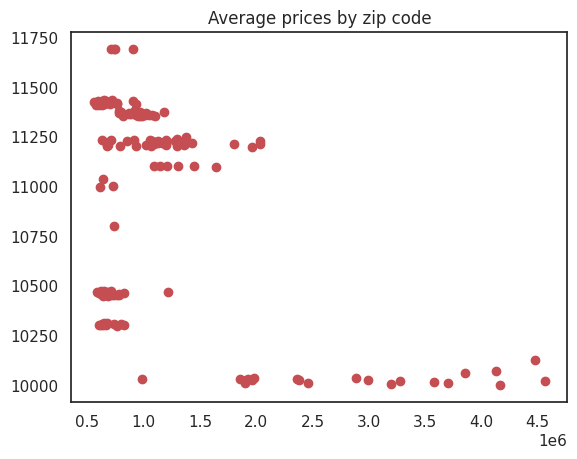

In [165]:
sorted_zipcodes = sorted(df['ZIP CODE'].unique())[1:]
sorted_zipcodes.pop(43)
average_prices = [find_average_home_price_by_zipcode(df, zipcode) for zipcode in sorted_zipcodes]

plt.plot(average_prices, sorted_zipcodes, 'ro')
plt.title("Average prices by zip code")

In [166]:
def find_average_home_price_by_bourough(borough):
    sale_prices = df[df['BOROUGH'] == borough]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 100]
    return np.mean(sale_prices)

In [167]:
boroughs = sorted(df['BOROUGH'].unique())
avg_borough_prices = [find_average_home_price_by_bourough(borough) for borough in boroughs]

Text(0.5, 1.0, 'Average sale price by borough')

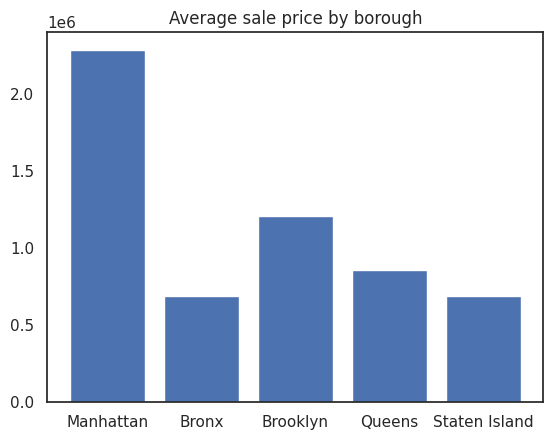

In [168]:
# Manhattan == 1
# Bronx == 2
# Brooklyn == 3
# Queens == 4
# Staten Island == 5
borough_names = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
plt.bar(borough_names, avg_borough_prices)
plt.title('Average sale price by borough')

(0.0, 10000000.0)

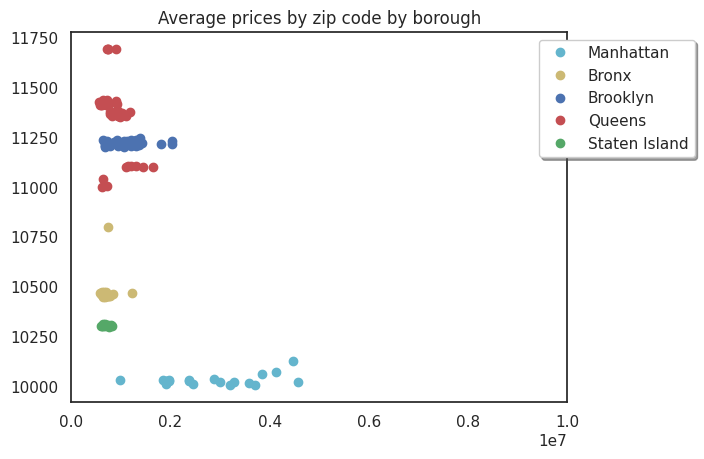

In [169]:
colors = ['c', 'y', 'b', 'r', 'g']
for i, borough in enumerate(boroughs):
    bf = df[df['BOROUGH'] == borough]
    sorted_zipcodes = sorted(bf['ZIP CODE'].unique())[1:]
    average_prices = [find_average_home_price_by_zipcode(bf, zipcode) for zipcode in sorted_zipcodes]
    plt.plot(average_prices, sorted_zipcodes, 'ro', label=borough_names[i], color = colors[i])
    plt.title("Average prices by zip code by borough")

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.xlim(0, 10000000)

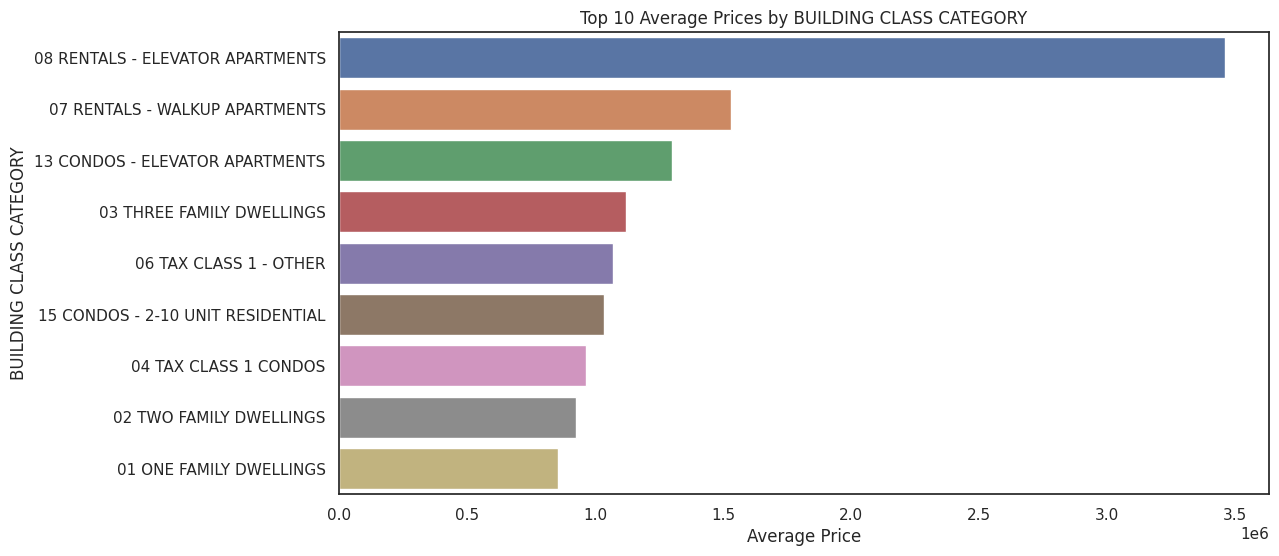

In [170]:
# Calculate average prices by BUILDING CLASS CATEGORY
average_prices = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].mean().sort_values(ascending=False)

# Select the top 10 BUILDING CLASS CATEGORY
top_10_categories = average_prices.head(10)

# Plotting the barplot with swapped axes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index)
plt.xlabel('Average Price')
plt.ylabel('BUILDING CLASS CATEGORY')
plt.title('Top 10 Average Prices by BUILDING CLASS CATEGORY')
plt.show()

## **Handling Outliers**

In [171]:
def find_remove_outliers_iqr(data_sample):
    if len(data_sample) < 2:
        return data_sample
    '''calculate interquartile range'''
    q1, q3 = np.percentile(data_sample, 25) , np.percentile(data_sample, 75)
    iqr = q3 - q1
    # scipy.stats.iqr(data_sample)
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    data_without_outliers = [data for data in data_sample if data > lower and data < upper]
    return data_without_outliers

def create_normal_distribution(bdata):
    if len(bdata) < 2:
        return bdata
    data = find_remove_outliers_iqr(bdata)
    normal_distribution = []
    for _ in range(1000):
        # chose 30 random points without replacement
        size = 30 if len(data) > 30 else len(data) // 2
        picks = np.random.choice(a = data, replace=False, size = size)
        # add the mean of those points to our distribution
        normal_distribution.append(np.mean(picks))
    return normal_distribution

In [172]:
def plot_circle(histogram):
    labels = histogram.keys()
    sizes = histogram.values()
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#be3cb2', '#ffff00', '#00ffff']
    plt.pie(sizes,colors=colors, labels=labels, autopct='%1.2f%%',startangle=10, pctdistance=0.75)
    centre_circle = plt.Circle((0,0),0.50,fc='#ffffff')
    plt.gcf().gca().add_artist(centre_circle)

In [173]:
top = ['01 ONE FAMILY DWELLINGS                    ',
 '02 TWO FAMILY DWELLINGS                    ',
 '03 THREE FAMILY DWELLINGS                  ',
 '13 CONDOS - ELEVATOR APARTMENTS            ',
 '07 RENTALS - WALKUP APARTMENTS             ',
 '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
 '04 TAX CLASS 1 CONDOS                      ',]

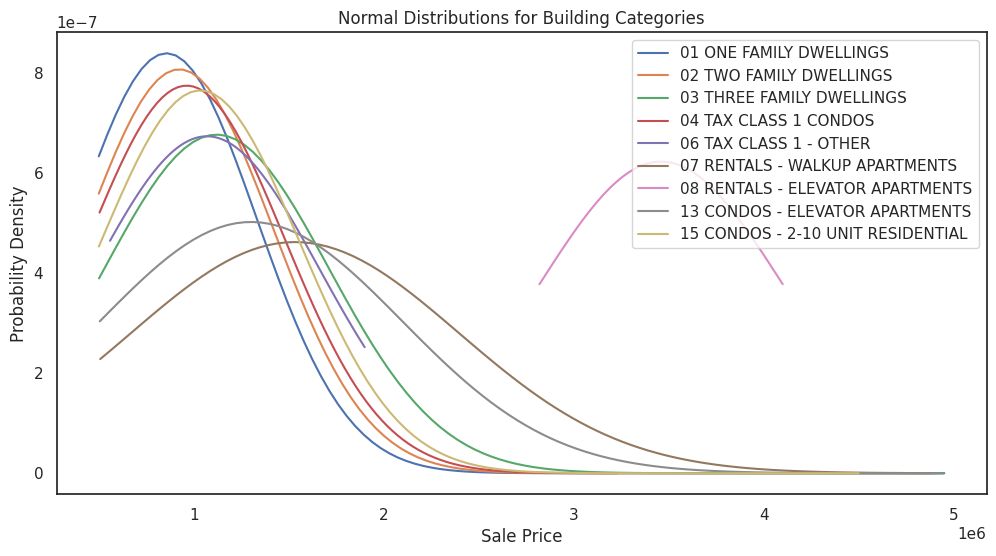

In [175]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Group the data by building category
grouped_data = df.groupby('BUILDING CLASS CATEGORY')

# Define the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each building category
for category, data in grouped_data:
    # Fit the data to a Normal Distribution
    mu, std = norm.fit(data['SALE PRICE'])
    
    # Generate x-axis values
    x = np.linspace(data['SALE PRICE'].min(), data['SALE PRICE'].max(), 100)
    
    # Plot the Normal Distribution curve
    ax.plot(x, norm.pdf(x, mu, std), label=category)
    
# Set the plot title and labels
ax.set_title('Normal Distributions for Building Categories')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

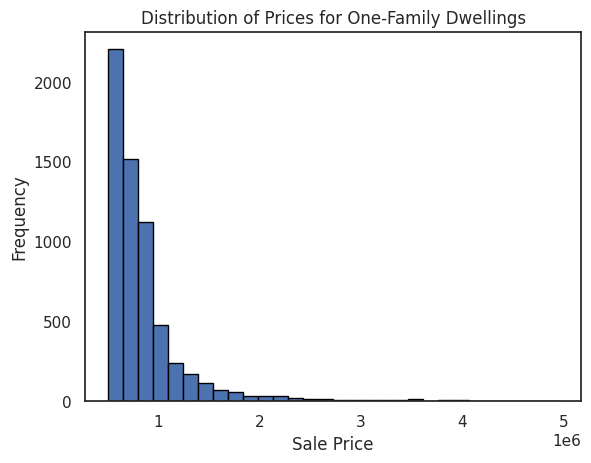

In [176]:
import matplotlib.pyplot as plt

# Filter the data for one-family dwellings
one_family_data = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']

# Create a histogram of the prices
plt.hist(one_family_data['SALE PRICE'], bins=30, edgecolor='black')

# Set the plot title and labels
plt.title('Distribution of Prices for One-Family Dwellings')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Distribution of prices of one family dwellings without outliers')

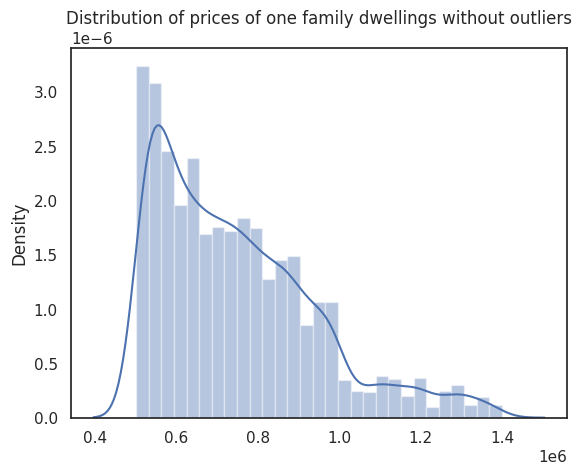

In [177]:
dp = sns.distplot(find_remove_outliers_iqr([price for price in df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']['SALE PRICE'].dropna() if price > 0]))
np.mean(find_remove_outliers_iqr([price for price in df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']['SALE PRICE'].dropna() if price > 0]))
dp.set_title('Distribution of prices of one family dwellings without outliers')

Text(0.5, 1.0, 'Normal distribution of prices of one family dwellings without outliers')

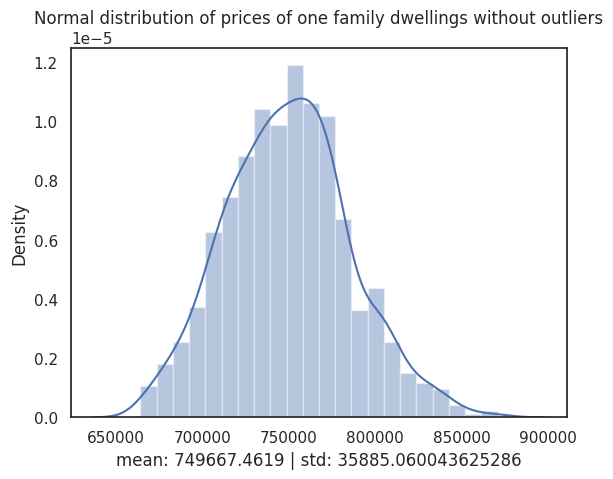

In [178]:
a = create_normal_distribution([price for price in df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']['SALE PRICE'].dropna() if price > 0])
mean, std = np.mean(a), np.std(a)
nd = sns.distplot(a, axlabel='mean: {} | std: {}'.format(mean, std))
nd.set_title('Normal distribution of prices of one family dwellings without outliers')

### With a standard deviation of about 35,885 and a mean of about 749,667
### We can assume that 68% of homes sold between 725k and 775k
### We can also assume that 95% of homes sold between 625k and 875k 

In [189]:
df.shape

(18423, 20)

# **Machine Learning**

## **Preprocessing**

In [190]:
def label_encode(column = ""):
    if column:
        df[column] = df[column].map(label_encoder(column))

# Label Encoder for neighborhood and Building class categroy
label_encode("NEIGHBORHOOD")
label_encode("BUILDING CLASS CATEGORY")

# DataFrame for Linear Regression (remove outliers)
lr_df = df.copy()

# Log sale price
df["SALE PRICE"] = np.log(df["SALE PRICE"])

# Chosen features for ML models
modified_df = df[["BOROUGH",
                  "NEIGHBORHOOD",
                  "BLOCK",
                  "LOT",
                  "BUILDING CLASS CATEGORY",
                  "RESIDENTIAL UNITS",
                  "GROSS SQUARE FEET",
                  ]]

y = df["SALE PRICE"]

# Split to train and test
tr_x_train, tr_x_test, tr_y_train, tr_y_test = train_test_split(modified_df,y, test_size=0.2, random_state=42)


# Handling outliers for Linear Regression

# Calculate price per unit and transform to log
lr_df["price per unit"] = np.log(lr_df["SALE PRICE"] / lr_df["RESIDENTIAL UNITS"])

# Remove outliers 
lr_df = lr_df[(lr_df["price per unit"] > 11.7) & (lr_df["price per unit"] < 14.8)]

lr_modified = lr_df[["BOROUGH",
                  "NEIGHBORHOOD",
                  "BLOCK",
                  "LOT",
                  "BUILDING CLASS CATEGORY",
                  "RESIDENTIAL UNITS",
                  "GROSS SQUARE FEET",
                  "price per unit",
                  "SALE PRICE"]]

# Split to train and test
train_set, test_set = train_test_split(lr_modified, test_size=0.2, random_state=42)

# Split data and target in training set
lr_y_train_ppu = train_set["price per unit"].copy()
lr_y_train_ru = train_set["RESIDENTIAL UNITS"].copy() # For cross validation
lr_y_train = train_set["SALE PRICE"].copy()           # For cross validation
lr_x_train_ppu = train_set.drop(["SALE PRICE","price per unit","RESIDENTIAL UNITS"], axis = 1)

# Split data and target in test set
lr_y_test_ppu = test_set["price per unit"].copy()
lr_y_test = test_set["SALE PRICE"].copy()
lr_y_test_ru = test_set["RESIDENTIAL UNITS"]
lr_x_test_ppu = test_set.drop(["SALE PRICE","price per unit","RESIDENTIAL UNITS"], axis = 1)

## **Dummy Regressor**

In [191]:
## Trees
print("Trees df")

# Initialize Dummy estimator 
dummy_regr = DummyRegressor(strategy="median")

# Train estimator
dummy_regr.fit(tr_x_train, tr_y_train)

# Predict 
preds = np.exp(dummy_regr.predict(tr_x_test))


# Calculate RMSE
mse = mean_squared_error(np.exp(tr_y_test), preds)
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(np.exp(tr_y_test), preds)

# Print results
print("R-Squared: {:,.3f}".format(r2_score(np.exp(tr_y_test), preds)))
print("Root Mean Square Error: {:,.3f}".format(rmse))
print("Mean Absolute Error: {:,.3f}".format(mae))
print()


## Linear Regression
print("Linear Regression df")

# Initialize Dummy estimator 
lr_dummy_regr = DummyRegressor(strategy="median")

# Train estimator
lr_dummy_regr.fit(lr_x_train_ppu, lr_y_train_ppu)

# Predict 
lr_preds = np.exp(lr_dummy_regr.predict(lr_x_test_ppu))

# Calculate RMSE
mse = mean_squared_error(np.exp(lr_y_test_ppu) * lr_y_test_ru, lr_preds * lr_y_test_ru)
rmse = np.sqrt(mse)
# Calculate MAE
mae = mean_absolute_error(np.exp(lr_y_test_ppu)* lr_y_test_ru, lr_preds * lr_y_test_ru)

# Print results
print("R-Squared: {:,.3f}".format(r2_score(np.exp(lr_y_test_ppu) * lr_y_test_ru, lr_preds * lr_y_test_ru)))
print("Root Mean Square Error: {:,.3f}".format(rmse))
print("Mean Absolute Error: {:,.3f}".format(mae))
print()

Trees df
R-Squared: -0.107
Root Mean Square Error: 602,116.561
Mean Absolute Error: 346,494.955

Linear Regression df
R-Squared: -0.695
Root Mean Square Error: 680,709.220
Mean Absolute Error: 475,646.653



## **Pipeline**

In [192]:
# Pipeline
numeric_features = ['GROSS SQUARE FEET',"BLOCK","LOT", "NEIGHBORHOOD"]
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])


ohe_features = ["BUILDING CLASS CATEGORY", "BOROUGH"]
ohe_transformer = OneHotEncoder(sparse = False, handle_unknown = 'ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('scale', numeric_transformer, numeric_features),
        ('ohe', ohe_transformer, ohe_features),
        ])

## **ML Estimators**

In [193]:
# Linear regression Estimator
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

# Decision Tree Regressor
dtr = Pipeline(steps=[
                      ('dtr', DecisionTreeRegressor())])

# Extra Tree Regressor
etr = Pipeline(steps=[
                      ('etr', BaggingRegressor(ExtraTreeRegressor(random_state=42),
                                                        random_state = 42))])
# Random Forest Regressor
rfrr = Pipeline(steps=[
                      ('rfregression', RandomForestRegressor(random_state = 42, 
                                                             n_jobs= -1, 
                                                             n_estimators = 50, 
                                                             min_samples_leaf = 5))])

## **Cross Validation**

### **Linear Regression**

In [194]:
# initialize the model
kf = KFold(n_splits=10, random_state = 42, shuffle = True)

# make a list to store our RMSE 
lr_RMSEs, lr_R2, lr_MAE = [], [], []

# loop over the k folds
for train_index, validate_index in kf.split(lr_x_train_ppu):
    
    # train the model using the training set
    lr.fit(lr_x_train_ppu.iloc[train_index,], lr_y_train_ppu.iloc[train_index,])
    
    # predict on a the validation set
    predictions = lr.predict(lr_x_train_ppu.iloc[validate_index,])
    predictions = np.exp(predictions) * lr_y_train_ru.iloc[validate_index,]

    test_set = lr_y_train.iloc[validate_index]

    # Append scores
    lr_R2.append(r2_score(test_set, predictions))
    
    mse = mean_squared_error(test_set,predictions)
    lr_RMSEs.append(np.sqrt(mse))
    
    lr_MAE.append(mean_absolute_error(test_set, predictions))
    

    
# let's look at the output from k fold
print("Linear Regression: ")
print("R-Squared: {:,.3f}".format(np.mean(lr_R2)))
print("Root Mean Squared Error: {:,.3f}".format(np.mean(lr_RMSEs)))
print("Mean Absolute Error: {:,.3f}".format(np.mean(lr_MAE)))
print()

Linear Regression: 
R-Squared: 0.252
Root Mean Squared Error: 445,688.977
Mean Absolute Error: 262,219.829



### **Trees Model**

In [196]:
def validation(models = [], estimators = [], training = [], cv = 5, train_score = False):
    if len(models) != len(estimators):
        print("Error: model names and estimator must have the same length")
        return

    for model, estimator in zip(models, estimators):
        scores = cross_validate(estimator, training[0], training[1], cv=cv,
                            scoring=('r2',
                                        'neg_mean_squared_error',
                                        'neg_mean_absolute_error'),
                            return_train_score=train_score)
        print(model)
        print("R-Squared: {:,.3f}".format(np.mean(scores["test_r2"])))
        print("Root Mean Squared Error: {:,.3f}".format(np.mean(np.sqrt(-scores["test_neg_mean_squared_error"]))))
        print("Mean Absolute Error: {:,.3f}".format(np.mean(-scores["test_neg_mean_absolute_error"])))
        print()
        
validation(models = ["Decision Tree Regressor", "Extra Tree Regressor", "Random Forest"], 
           estimators = [dtr, etr, rfrr],
           training = [tr_x_train, np.exp(tr_y_train)])

Decision Tree Regressor
R-Squared: 0.379
Root Mean Squared Error: 471,876.511
Mean Absolute Error: 264,949.749

Extra Tree Regressor
R-Squared: 0.634
Root Mean Squared Error: 362,108.708
Mean Absolute Error: 211,420.586

Random Forest
R-Squared: 0.649
Root Mean Squared Error: 354,855.099
Mean Absolute Error: 206,175.793



## **Fit models**

In [197]:
# Train Trees
dtr.fit(tr_x_train, tr_y_train)
etr.fit(tr_x_train, tr_y_train) 
rfrr.fit(tr_x_train, tr_y_train)

Pipeline(steps=[('rfregression',
                 RandomForestRegressor(min_samples_leaf=5, n_estimators=50,
                                       n_jobs=-1, random_state=42))])

In [198]:
# Train Linear Regression
lr.fit(lr_x_train_ppu, lr_y_train_ppu) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['GROSS SQUARE FEET', 'BLOCK',
                                                   'LOT', 'NEIGHBORHOOD']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['BUILDING CLASS CATEGORY',
                                                   'BOROUGH'])])),
                ('regression', LinearRegression())])

## **Testing**

Descision Tree:
R-Squared: 0.419
Root Mean Square Error: 436,291.983
Mean Absolute Error: 248,038.854

Extra-Tree Regressor:
R-Squared: 0.652
Root Mean Square Error: 337,775.405
Mean Absolute Error: 194,745.277

Random Forest:
R-Squared: 0.650
Root Mean Square Error: 338,407.994
Mean Absolute Error: 190,655.493



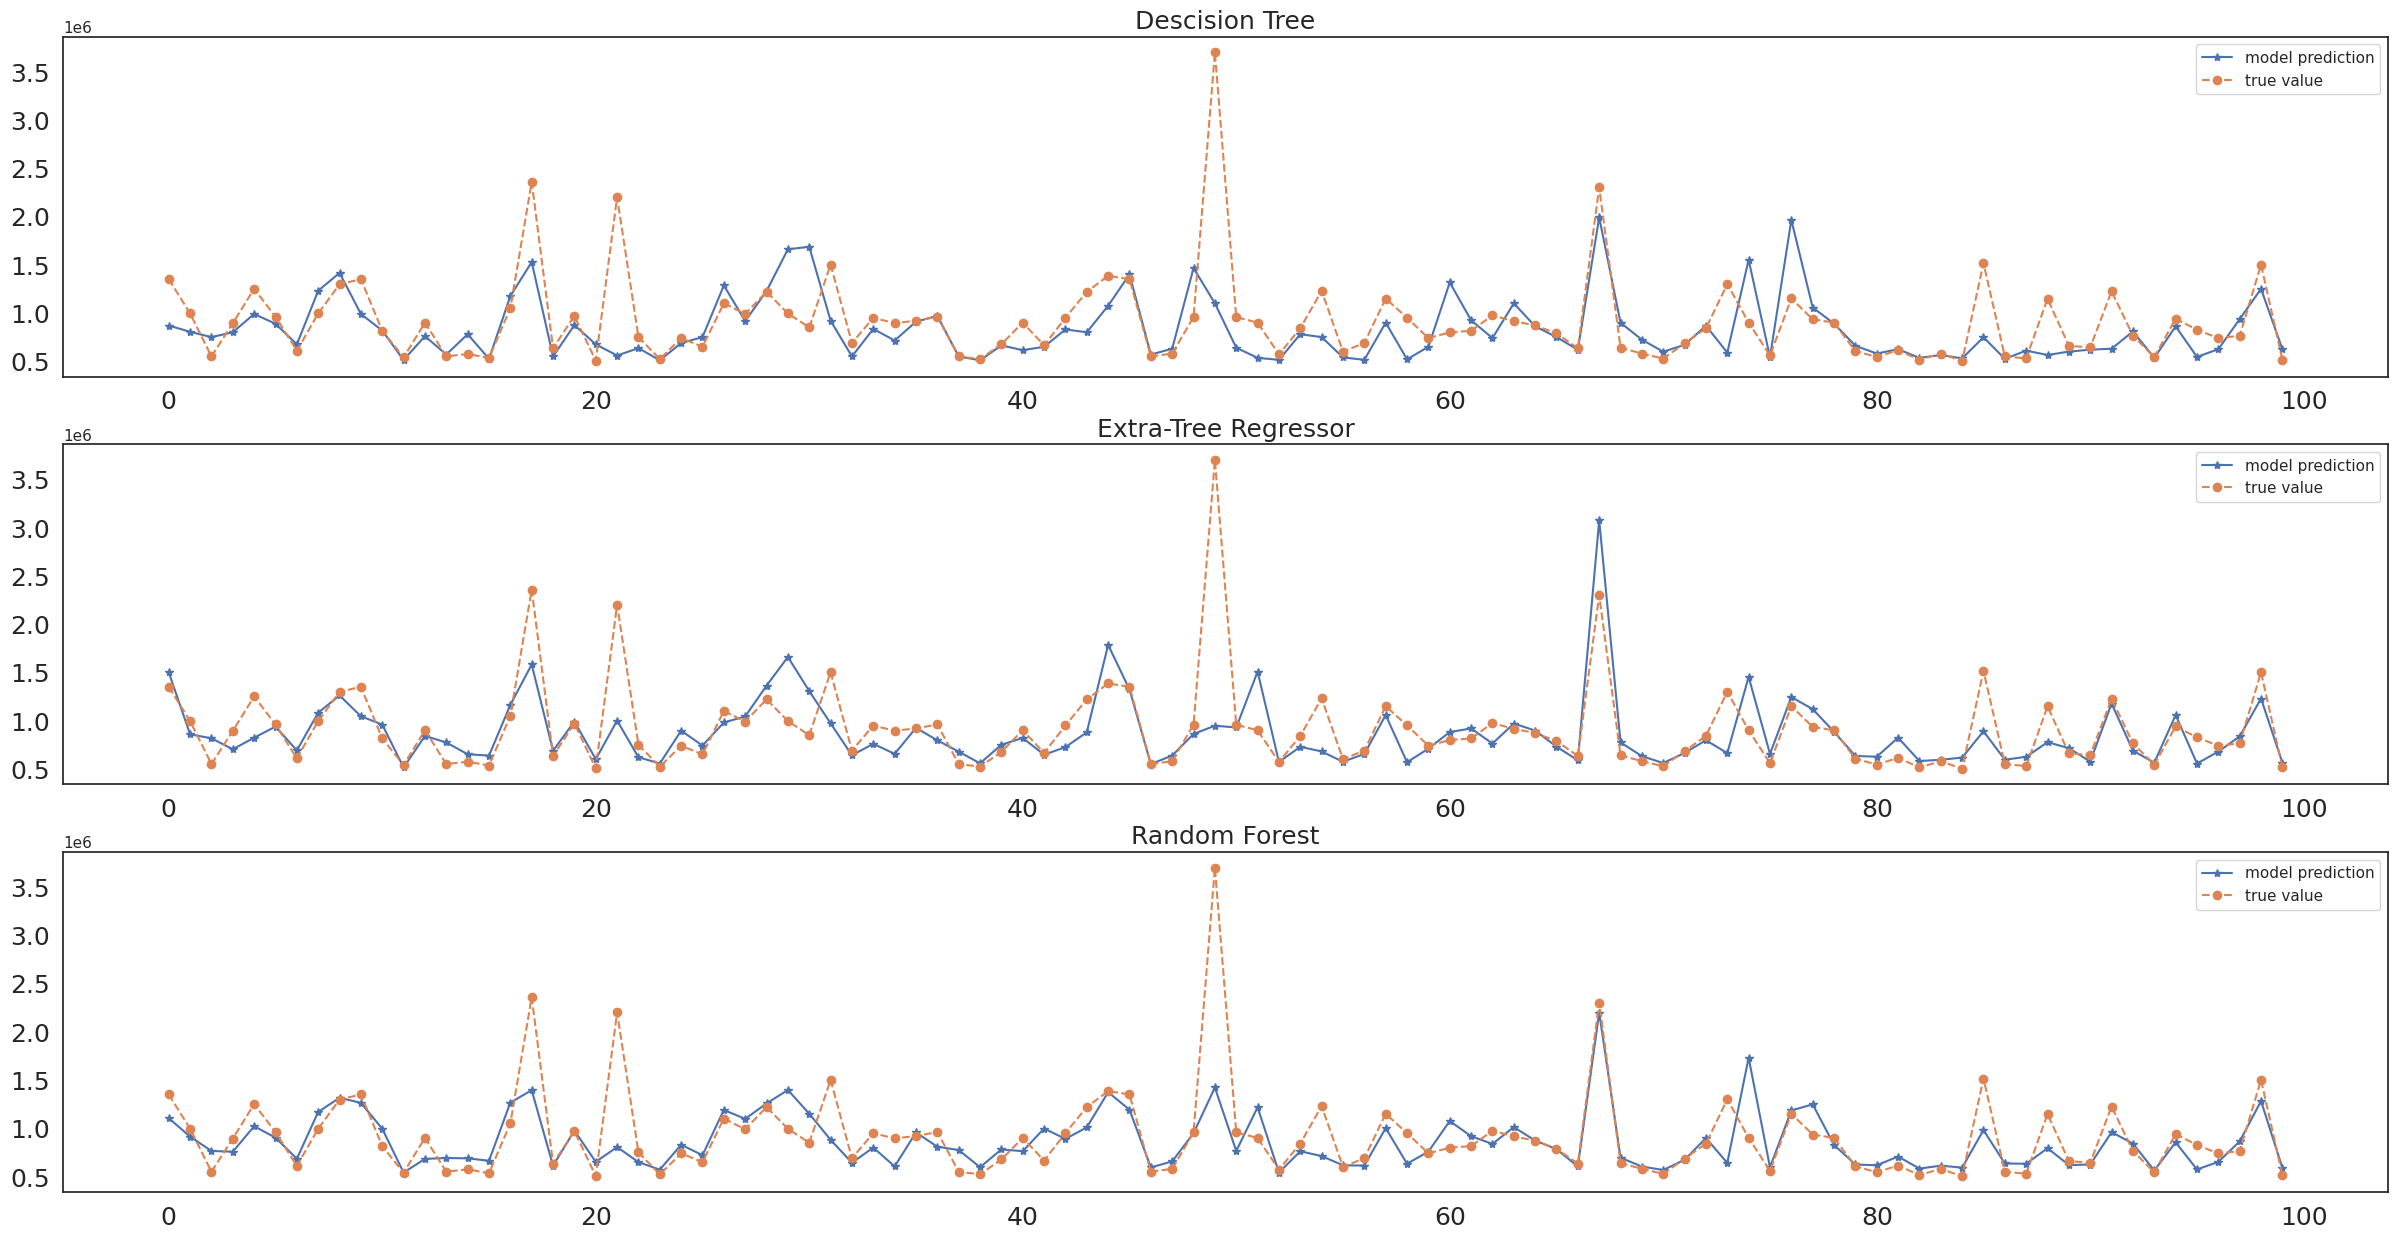

In [201]:
print_results(labels = ["Descision Tree:", "Extra-Tree Regressor:", "Random Forest:"],
             est = [dtr,etr, rfrr],
             plt_num = 100,
             testing = [tr_x_test, tr_y_test])

Linear Regression: 
R-Squared: 0.327
Root Mean Square Error: 428,974.407
Mean Absolute Error: 259,014.542



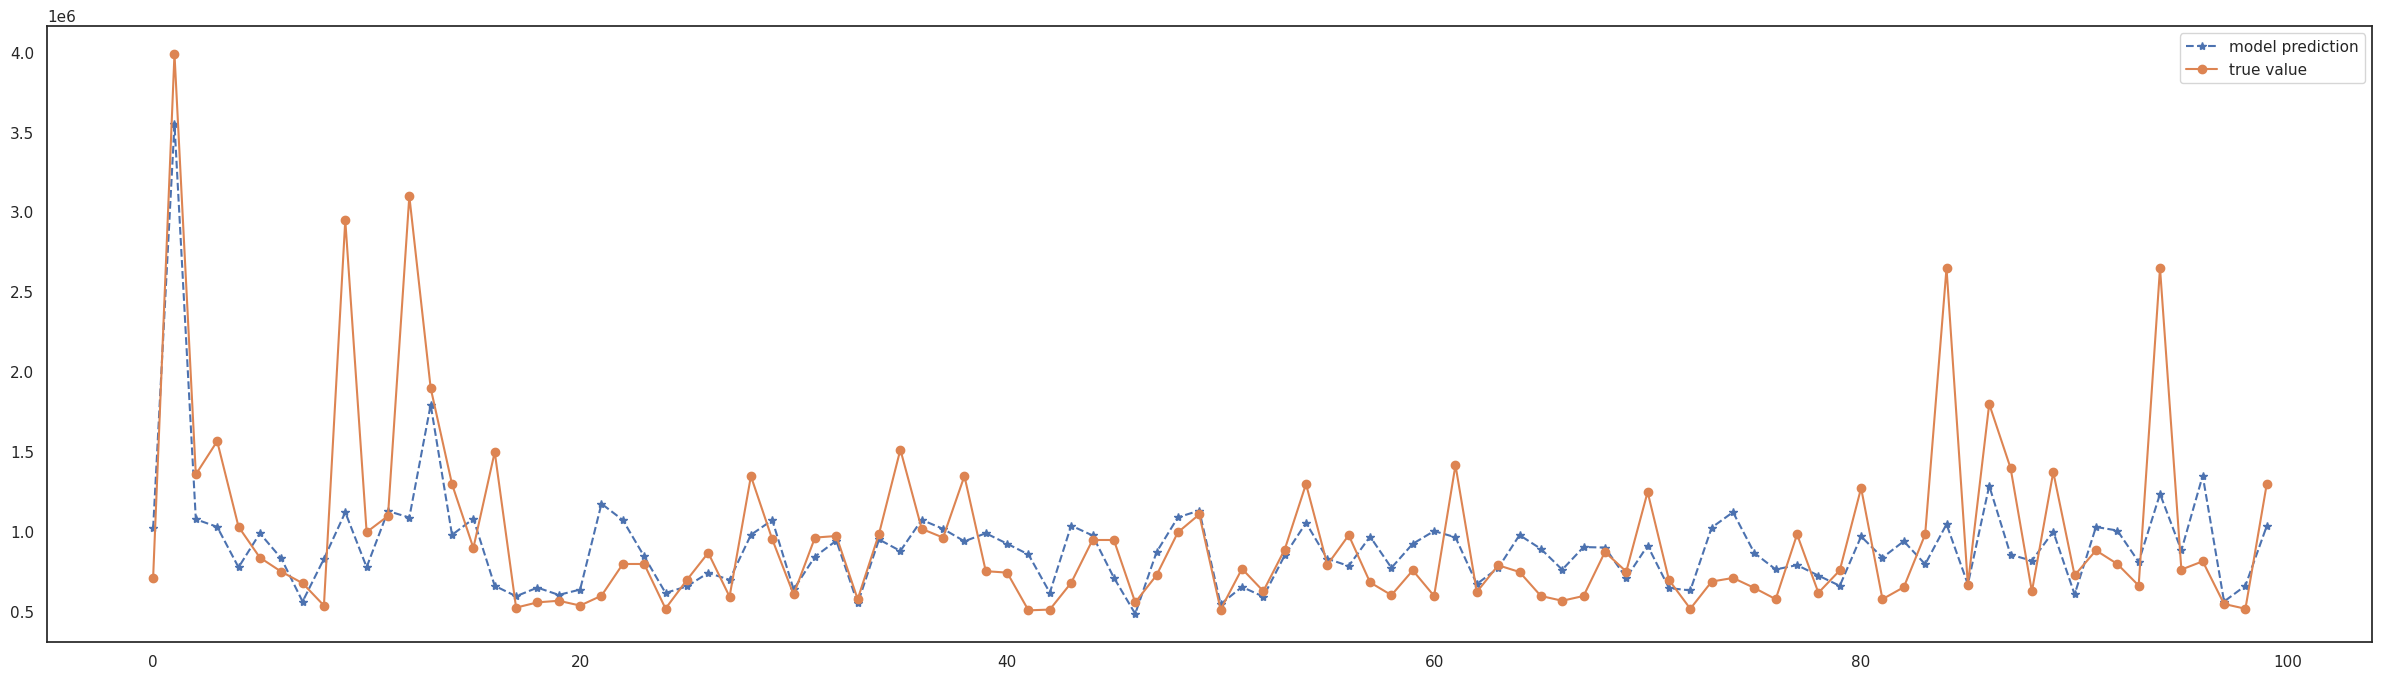

In [205]:
print("Linear Regression: ")

df_labels_prediction = lr.predict(lr_x_test_ppu)
df_labels_prediction =  np.exp(df_labels_prediction) * lr_y_test_ru

print("R-Squared: {:.3f}".format(r2_score(lr_y_test, df_labels_prediction)))
mse = mean_squared_error(lr_y_test,df_labels_prediction) 
mae = mean_absolute_error(lr_y_test, df_labels_prediction)

rmse = np.sqrt(mse)
print("Root Mean Square Error: {:,.3f}".format(rmse))
print("Mean Absolute Error: {:,.3f}".format(mae))
print()

plt.rcParams["figure.figsize"] = (30,8)
plt.plot(range(100), df_labels_prediction[:100],"*--" ,label='model prediction')
plt.plot(range(100), lr_y_test[:100],"o-", label='true value')
plt.legend()